## Covid-19 Dataset

#### This is a small dataset showing covid-19 cases in many regions

#### This dataset is recorded in 29th of April 2020

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
file_path = r'C:\Users\PC\Documents\jupyter notebook\Data Analysis projects\Covid-19 Dataset\covid_19_data.csv'

In [114]:
df = pd.read_csv(file_path)

In [115]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [117]:
df.shape

(321, 6)

In [118]:
df.nunique()

Date           1
State        137
Region       187
Confirmed    282
Deaths       142
Recovered    195
dtype: int64

In [119]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [120]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

### The number of Confirmed, Deaths and Recovered cases in each Region.

In [121]:
df.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [122]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).reset_index()

,Region,Confirmed
0,US,1039909
1,Spain,236899
2,Italy,203591
3,France,166543
4,UK,166441
...,...,...
182,Sao Tome and Principe,8
183,Papua New Guinea,8
184,Bhutan,7
185,Western Sahara,6


In [123]:
df.groupby('Region')['Confirmed','Recovered'].sum().sort_values(['Confirmed'],ascending=False).reset_index()

<ipython-input-123-bdaf43e88f5d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed','Recovered'].sum().sort_values(['Confirmed'],ascending=False).reset_index()


,Region,Confirmed,Recovered
0,US,1039909,120720
1,Spain,236899,132929
2,Italy,203591,71252
3,France,166543,49118
4,UK,166441,857
...,...,...,...
182,Sao Tome and Principe,8,4
183,Papua New Guinea,8,0
184,Bhutan,7,5
185,Western Sahara,6,5


### Remove records where confirmed is less than 10 cases

In [124]:
df = df[~(df.Confirmed < 10)]
df.count()

Date         304
State        130
Region       304
Confirmed    304
Deaths       304
Recovered    304
dtype: int64

### In which region a maximum number of confirmed cases was recorded?

In [125]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(30)

,Region,Confirmed
0,US,1039909
1,Spain,236899
2,Italy,203591
3,France,166536
4,UK,166432
5,Germany,161539
6,Turkey,117589
7,Russia,99399
8,Iran,93657
9,Mainland China,82861


### In which region a maximum number of recovered cases was recorded?

In [126]:
df.groupby('Region')['Recovered'].sum().sort_values(ascending=False).reset_index().head(30)

,Region,Recovered
0,Spain,132929
1,Germany,120400
2,Mainland China,77609
3,Iran,73791
4,Italy,71252
5,France,49112
6,Turkey,44040
7,Brazil,34132
8,Switzerland,22600
9,Ireland,13386


### In which region a minimum number of Dead cases was recorded?

In [127]:
df.groupby('Region')['Deaths'].sum().sort_values().reset_index().head(50)


,Region,Deaths
0,Cambodia,0
1,Seychelles,0
2,Saint Lucia,0
3,Central African Republic,0
4,Saint Kitts and Nevis,0
5,South Sudan,0
6,Rwanda,0
7,Grenada,0
8,Macau,0
9,Madagascar,0


### (instruction) How many Confirmed, Deaths & Recovered cases were reported from India?

In [128]:
df[df.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### (instruction) How many Confirmed, Deaths & Recovered cases were reported from US?

In [129]:
df[df.Region == 'US'].sort_values('Confirmed',ascending=False).reset_index()

,index,Date,State,Region,Confirmed,Deaths,Recovered
0,265,4/29/2020,New York,US,299691,23477,0
1,262,4/29/2020,New Jersey,US,116365,6771,0
2,249,4/29/2020,Massachusetts,US,60265,3405,0
3,232,4/29/2020,Illinois,US,50358,2215,0
4,195,4/29/2020,California,US,48747,1946,0
5,278,4/29/2020,Pennsylvania,US,46327,2373,0
6,251,4/29/2020,Michigan,US,40399,3670,0
7,208,4/29/2020,Florida,US,33193,1218,0
8,243,4/29/2020,Louisiana,US,27660,1845,0
9,303,4/29/2020,Texas,US,27257,754,0


In [130]:
df.sort_values('Confirmed', ascending=False).head(50).reset_index()

,index,Date,State,Region,Confirmed,Deaths,Recovered
0,265,4/29/2020,New York,US,299691,23477,0
1,153,4/29/2020,NaN,Spain,236899,24275,132929
2,80,4/29/2020,NaN,Italy,203591,27682,71252
3,168,4/29/2020,NaN,UK,165221,26097,0
4,57,4/29/2020,NaN,France,165093,24087,48228
5,61,4/29/2020,NaN,Germany,161539,6467,120400
6,167,4/29/2020,NaN,Turkey,117589,3081,44040
7,262,4/29/2020,New Jersey,US,116365,6771,0
8,134,4/29/2020,NaN,Russia,99399,972,10286
9,76,4/29/2020,NaN,Iran,93657,5957,73791


In [131]:
df.sort_values('Deaths').head(50).reset_index()

,index,Date,State,Region,Confirmed,Deaths,Recovered
0,55,4/29/2020,NaN,Fiji,18,0,12
1,207,4/29/2020,Faroe Islands,Denmark,187,0,181
2,206,4/29/2020,Falkland Islands (Malvinas),UK,13,0,11
3,204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
4,45,4/29/2020,NaN,Dominica,16,0,13
5,29,4/29/2020,NaN,Cambodia,122,0,119
6,175,4/29/2020,NaN,Vietnam,270,0,222
7,31,4/29/2020,NaN,Central African Republic,50,0,10
8,169,4/29/2020,NaN,Uganda,81,0,52
9,163,4/29/2020,NaN,Timor-Leste,24,0,6


<AxesSubplot:ylabel='Frequency'>

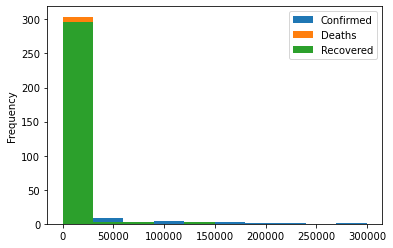

In [151]:
df.plot(kind="hist")